In [1]:
import numpy as np

In [60]:
tab = np.loadtxt('../SFR_tables/sfr_table_UniverseMachine.dat')

In [61]:
tab.shape

(15372, 4)

In [92]:
zp1 = tab[:,0]+1
logM = tab[:,1]
logSFR = tab[:,2]
scat = tab[:,3]

In [93]:
zz = np.unique(zp1)
MM = np.unique(logM)

In [94]:
len(zz)*len(MM)

15372

In [95]:
logSFR[np.isnan(logSFR)] = -40.
logSFR[scat==0] = -40.

In [96]:
zg,Mg = np.meshgrid(zz,MM)

In [97]:
zd = zg.flatten()

In [98]:
Md = Mg.flatten()

In [99]:
SFRd = np.zeros(len(zd))
scatd = np.zeros(len(zd))

In [100]:
for i in range(len(zd)):
    SFRd[i] = logSFR[np.where(np.logical_and(zp1==zd[i],logM==Md[i]))]
    scatd[i] = scat[np.where(np.logical_and(zp1==zd[i],logM==Md[i]))]

In [101]:
TAB = np.zeros((len(zd),4))
TAB[:,0] = zd
TAB[:,1] = Md
TAB[:,2] = SFRd
TAB[:,3] = scatd
np.savetxt('../SFR_tables/sfr_table_UniverseMachine_clean.dat',TAB)

# test

In [102]:
from scipy.interpolate import interp2d,interp1d
import matplotlib.pyplot as plt

In [103]:
def SFR_Mz_2dinterp(M,z,filename):
    '''
    Returns SFR(M,z) interpolated from tables following the same order as
    the function Behroozi_SFR. The table includes 1+z, log10(Mhalo/Msun) and 
    SFR (Msun/yr)
    '''
    x = np.loadtxt(filename)
    zb = np.unique(x[:,0])-1.
    logMb = np.unique(x[:,1])
    logSFRb = x[:,2].reshape(len(zb),len(logMb),order='F')
    
    logSFR_interp = interp2d(logMb,zb,logSFRb,bounds_error=False,fill_value=-40.)
    
    logM = np.log10(M)
    if np.array(z).size>1:
        SFR = np.zeros(logM.size)
        for ii in range(0,logM.size):
            SFR[ii] = 10.**logSFR_interp(logM[ii],z[ii])
    else:
        SFR = 10.**logSFR_interp(logM,z)
    
    return SFR
 

In [107]:
MM = np.logspace(8,15,1000)
ZZ = 2.8

In [108]:
BWC = SFR_Mz_2dinterp(MM,ZZ,'../SFR_tables/sfr_table_Behroozi.dat')
UM = SFR_Mz_2dinterp(MM,ZZ,'../SFR_tables/sfr_table_UniverseMachine_clean.dat')

Text(0.5, 1.0, 'z=2.8')

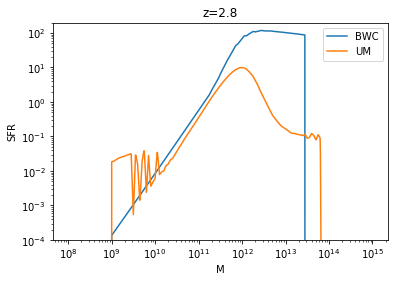

In [111]:
plt.loglog(MM,BWC,label='BWC')
plt.loglog(MM,UM,label='UM')
plt.legend()
plt.ylim(1e-4,2e2)
plt.xlabel('M')
plt.ylabel('SFR')
plt.title('z=2.8')